## 판다스 자습서

### 시리즈 생성

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image

In [2]:
pd.__version__

'1.1.5'

In [3]:
d1 = [1, 3, 5, np.nan, 6, 8]
s = pd.Series(d1)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### numpy배열객체를 이용한 Dataframe생성

In [4]:
dates = pd.date_range(start = '20130101', periods = 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# ValueError: Shape of passed values is (4, 6), indices imply (4, 10)
# 행 혹은 열의 쌍이 맞지 않으면 에러 남.
col = list('ABCD')
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = col)
print(df)

                   A         B         C         D
2013-01-01  0.384780 -0.080464  0.708716  0.483211
2013-01-02 -0.460947 -0.818167 -0.714454 -1.196904
2013-01-03  1.012670  0.226344 -0.003541 -0.317329
2013-01-04 -0.549520  1.765742  0.039503  1.462494
2013-01-05 -0.334534 -0.377940  0.464907 -0.564798
2013-01-06  1.396343  1.138403 -0.291573  0.253225


### dict객체를 이용한 데이터프레임 생성

In [6]:
dict_a = {
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
}
print(dict_a)
df2 = pd.DataFrame(dict_a)
print(df2)

{'A': 1.0, 'B': Timestamp('2013-01-02 00:00:00'), 'C': 0    1.0
1    1.0
2    1.0
3    1.0
dtype: float32, 'D': array([3, 3, 3, 3]), 'E': ['test', 'train', 'test', 'train']
Categories (2, object): ['test', 'train'], 'F': 'foo'}
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 데이터 프레임 보기

In [8]:
df.head(n = 3)

,A,B,C,D
2013-01-01,0.384780,-0.080464,0.708716,0.483211
2013-01-02,-0.460947,-0.818167,-0.714454,-1.196904
2013-01-03,1.012670,0.226344,-0.003541,-0.317329


In [9]:
df.tail(n = 3)

,A,B,C,D
2013-01-04,-0.549520,1.765742,0.039503,1.462494
2013-01-05,-0.334534,-0.377940,0.464907,-0.564798
2013-01-06,1.396343,1.138403,-0.291573,0.253225


In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[ 0.38477951, -0.08046428,  0.70871618,  0.48321056],
       [-0.46094687, -0.81816742, -0.71445406, -1.19690387],
       [ 1.01267049,  0.22634422, -0.00354111, -0.31732945],
       [-0.54952034,  1.76574244,  0.03950292,  1.46249432],
       [-0.33453409, -0.37794015,  0.46490685, -0.56479817],
       [ 1.39634262,  1.13840261, -0.2915731 ,  0.25322546]])

###  to_numpy()
* 에러시 해당 api가 버전에서 지원하지 않으므로 발생하는것
* pandas.__version__()확인후 '0.20.4'가 아니면 아래 명령어로 업데이트 
* conda pandas update 혹은 pip3 install --upgrade pandas

In [13]:
df.to_numpy()

array([[ 0.38477951, -0.08046428,  0.70871618,  0.48321056],
       [-0.46094687, -0.81816742, -0.71445406, -1.19690387],
       [ 1.01267049,  0.22634422, -0.00354111, -0.31732945],
       [-0.54952034,  1.76574244,  0.03950292,  1.46249432],
       [-0.33453409, -0.37794015,  0.46490685, -0.56479817],
       [ 1.39634262,  1.13840261, -0.2915731 ,  0.25322546]])

* describe() show as short statistics of data.

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.241465,0.308986,0.033926,0.019983
std,0.824603,0.970661,0.511575,0.925892
min,-0.549520,-0.818167,-0.714454,-1.196904
25%,-0.429344,-0.303571,-0.219565,-0.502931
50%,0.025123,0.072940,0.017981,-0.032052
75%,0.855698,0.910388,0.358556,0.425714
max,1.396343,1.765742,0.708716,1.462494


In [15]:
print(df.head())
print(df.shape)

df.T   # Transposing your data

                   A         B         C         D
2013-01-01  0.384780 -0.080464  0.708716  0.483211
2013-01-02 -0.460947 -0.818167 -0.714454 -1.196904
2013-01-03  1.012670  0.226344 -0.003541 -0.317329
2013-01-04 -0.549520  1.765742  0.039503  1.462494
2013-01-05 -0.334534 -0.377940  0.464907 -0.564798
(6, 4)


,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.384780,-0.460947,1.012670,-0.549520,-0.334534,1.396343
B,-0.080464,-0.818167,0.226344,1.765742,-0.377940,1.138403
C,0.708716,-0.714454,-0.003541,0.039503,0.464907,-0.291573
D,0.483211,-1.196904,-0.317329,1.462494,-0.564798,0.253225


* sorted columns by descedning order.<br>
  *1. ascending = True ; ascending order<br>
  *2. ascending = False; descending order

In [16]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,0.483211,0.708716,-0.080464,0.384780
2013-01-02,-1.196904,-0.714454,-0.818167,-0.460947
2013-01-03,-0.317329,-0.003541,0.226344,1.012670
2013-01-04,1.462494,0.039503,1.765742,-0.549520
2013-01-05,-0.564798,0.464907,-0.377940,-0.334534
2013-01-06,0.253225,-0.291573,1.138403,1.396343


In [17]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-02,-0.460947,-0.818167,-0.714454,-1.196904
2013-01-05,-0.334534,-0.377940,0.464907,-0.564798
2013-01-01,0.384780,-0.080464,0.708716,0.483211
2013-01-03,1.012670,0.226344,-0.003541,-0.317329
2013-01-06,1.396343,1.138403,-0.291573,0.253225
2013-01-04,-0.549520,1.765742,0.039503,1.462494


### Getting

In [18]:
df['A']  # equibalent to df.A
df.A

2013-01-01    0.384780
2013-01-02   -0.460947
2013-01-03    1.012670
2013-01-04   -0.549520
2013-01-05   -0.334534
2013-01-06    1.396343
Freq: D, Name: A, dtype: float64

* Selecting via `[]`, which means slicing.

In [19]:
df[0:10] , df

(                   A         B         C         D
 2013-01-01  0.384780 -0.080464  0.708716  0.483211
 2013-01-02 -0.460947 -0.818167 -0.714454 -1.196904
 2013-01-03  1.012670  0.226344 -0.003541 -0.317329
 2013-01-04 -0.549520  1.765742  0.039503  1.462494
 2013-01-05 -0.334534 -0.377940  0.464907 -0.564798
 2013-01-06  1.396343  1.138403 -0.291573  0.253225,
                    A         B         C         D
 2013-01-01  0.384780 -0.080464  0.708716  0.483211
 2013-01-02 -0.460947 -0.818167 -0.714454 -1.196904
 2013-01-03  1.012670  0.226344 -0.003541 -0.317329
 2013-01-04 -0.549520  1.765742  0.039503  1.462494
 2013-01-05 -0.334534 -0.377940  0.464907 -0.564798
 2013-01-06  1.396343  1.138403 -0.291573  0.253225)

In [20]:
df['2020-03-01': '2020-03-05']

,A,B,C,D


### Selection by label

In [21]:
dates, dates[0]

(DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
                '2013-01-05', '2013-01-06'],
               dtype='datetime64[ns]', freq='D'),
 Timestamp('2013-01-01 00:00:00', freq='D'))

In [22]:
df.loc[dates[0]]

A    0.384780
B   -0.080464
C    0.708716
D    0.483211
Name: 2013-01-01 00:00:00, dtype: float64

### Selecting on a multi-axis by label

In [23]:
df.head()
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.384780,-0.080464
2013-01-02,-0.460947,-0.818167
2013-01-03,1.012670,0.226344
2013-01-04,-0.549520,1.765742
2013-01-05,-0.334534,-0.377940
2013-01-06,1.396343,1.138403


In [24]:
df.loc['2013-01-01': '20130104', ['A', 'B']]

,A,B
2013-01-01,0.384780,-0.080464
2013-01-02,-0.460947,-0.818167
2013-01-03,1.012670,0.226344
2013-01-04,-0.549520,1.765742


#### getting a scalar value

In [25]:
df.loc[dates[0], 'A']

0.3847795144879913

In [26]:
df.at[dates[0], 'A']

0.3847795144879913

### Seletion by Position

In [27]:
df.head()

,A,B,C,D
2013-01-01,0.384780,-0.080464,0.708716,0.483211
2013-01-02,-0.460947,-0.818167,-0.714454,-1.196904
2013-01-03,1.012670,0.226344,-0.003541,-0.317329
2013-01-04,-0.549520,1.765742,0.039503,1.462494
2013-01-05,-0.334534,-0.377940,0.464907,-0.564798


In [28]:
df.iloc[3] # 인덱스가 `201-01-04`인것을 가져옴

A   -0.549520
B    1.765742
C    0.039503
D    1.462494
Name: 2013-01-04 00:00:00, dtype: float64

By integer ***slices*** , acting similiar to numpy/python

In [29]:
df.iloc[3:5, 0:2] # 끝의 인덱스는 포함되지 않는다.

,A,B
2013-01-04,-0.549520,1.765742
2013-01-05,-0.334534,-0.377940


By list of integer locations , similar to numpy/python

In [30]:
df

,A,B,C,D
2013-01-01,0.384780,-0.080464,0.708716,0.483211
2013-01-02,-0.460947,-0.818167,-0.714454,-1.196904
2013-01-03,1.012670,0.226344,-0.003541,-0.317329
2013-01-04,-0.549520,1.765742,0.039503,1.462494
2013-01-05,-0.334534,-0.377940,0.464907,-0.564798
2013-01-06,1.396343,1.138403,-0.291573,0.253225


In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.460947,-0.714454
2013-01-03,1.012670,-0.003541
2013-01-05,-0.334534,0.464907


slicing explicitly...

In [32]:
df.iloc[1:3, :]  

,A,B,C,D
2013-01-02,-0.460947,-0.818167,-0.714454,-1.196904
2013-01-03,1.012670,0.226344,-0.003541,-0.317329


In [33]:
df.iloc[:, 1:3] # 2번째 컬럼부터 4번째 컬럼은 포함안됨.

,B,C
2013-01-01,-0.080464,0.708716
2013-01-02,-0.818167,-0.714454
2013-01-03,0.226344,-0.003541
2013-01-04,1.765742,0.039503
2013-01-05,-0.377940,0.464907
2013-01-06,1.138403,-0.291573


In [34]:
df.head(n = 10)

,A,B,C,D
2013-01-01,0.384780,-0.080464,0.708716,0.483211
2013-01-02,-0.460947,-0.818167,-0.714454,-1.196904
2013-01-03,1.012670,0.226344,-0.003541,-0.317329
2013-01-04,-0.549520,1.765742,0.039503,1.462494
2013-01-05,-0.334534,-0.377940,0.464907,-0.564798
2013-01-06,1.396343,1.138403,-0.291573,0.253225


* for getting a value explicity:

In [35]:
%timeit df.iloc[1, 1] 

The slowest run took 4.28 times longer than the fastest. This could mean that an intermediate result is being cached.
79.6 µs ± 34.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


* 상수값을 가져오는데 가장 빠른 방법.위의 `.iloc()`와 동일한 결과를 출력

In [36]:
%timeit df.iat[1, 1]

95.8 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Boolean indexing

#### `A`컬럼의 값이 0보다 큰것

In [37]:
df[df['A'] > 0]

,A,B,C,D
2013-01-01,0.384780,-0.080464,0.708716,0.483211
2013-01-03,1.012670,0.226344,-0.003541,-0.317329
2013-01-06,1.396343,1.138403,-0.291573,0.253225


#### 주어진 조건을 만족하는 값들을 데이터프레임으로 추출

In [38]:
df[df > 0]

,A,B,C,D
2013-01-01,0.384780,NaN,0.708716,0.483211
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,1.012670,0.226344,NaN,NaN
2013-01-04,NaN,1.765742,0.039503,1.462494
2013-01-05,NaN,NaN,0.464907,NaN
2013-01-06,1.396343,1.138403,NaN,0.253225


In [39]:
df2 = df.copy()
print(id(df2), id(df))

df2['E'] = ['one', 'one', 'two', 'three','four','three']

645312090704 645122177776


In [40]:
df2

,A,B,C,D,E
2013-01-01,0.384780,-0.080464,0.708716,0.483211,one
2013-01-02,-0.460947,-0.818167,-0.714454,-1.196904,one
2013-01-03,1.012670,0.226344,-0.003541,-0.317329,two
2013-01-04,-0.549520,1.765742,0.039503,1.462494,three
2013-01-05,-0.334534,-0.377940,0.464907,-0.564798,four
2013-01-06,1.396343,1.138403,-0.291573,0.253225,three


`isin()` 는 특정 컬럼값이 주어진 점조건에 있는 것만 추출

In [41]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,1.012670,0.226344,-0.003541,-0.317329,two
2013-01-05,-0.334534,-0.377940,0.464907,-0.564798,four


### Setting

In [42]:
s1 = pd.Series(data = [1, 2, 3, 4, 5, 6],index = pd.date_range(start='20130101', periods=6 ))
s1

2013-01-01    1
2013-01-02    2
2013-01-03    3
2013-01-04    4
2013-01-05    5
2013-01-06    6
Freq: D, dtype: int64

In [43]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.384780,-0.080464,0.708716,0.483211,1
2013-01-02,-0.460947,-0.818167,-0.714454,-1.196904,2
2013-01-03,1.012670,0.226344,-0.003541,-0.317329,3
2013-01-04,-0.549520,1.765742,0.039503,1.462494,4
2013-01-05,-0.334534,-0.377940,0.464907,-0.564798,5
2013-01-06,1.396343,1.138403,-0.291573,0.253225,6


In [44]:
type(dates)
dir(dates) # `_getitem__`을 지원하면 slicing이 가능
print(dates[0])

2013-01-01 00:00:00


`명칭기반 인덱싱`으로 값을 변경

In [45]:
df.at[dates[0], 'A'] = 0

`위치`로 값을 변경

In [46]:
df.iat[0, 1] = 0  # 1번째 행의 두번째 컬럼인 'B'컬럼을 0으로 갱신

In [47]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.708716,0.483211,1
2013-01-02,-0.460947,-0.818167,-0.714454,-1.196904,2
2013-01-03,1.012670,0.226344,-0.003541,-0.317329,3
2013-01-04,-0.549520,1.765742,0.039503,1.462494,4
2013-01-05,-0.334534,-0.377940,0.464907,-0.564798,5
2013-01-06,1.396343,1.138403,-0.291573,0.253225,6


`Numpy array`을 이용한 값 할당

In [48]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.708716,5,1
2013-01-02,-0.460947,-0.818167,-0.714454,5,2
2013-01-03,1.012670,0.226344,-0.003541,5,3
2013-01-04,-0.549520,1.765742,0.039503,5,4
2013-01-05,-0.334534,-0.377940,0.464907,5,5
2013-01-06,1.396343,1.138403,-0.291573,5,6


In [49]:
df2 = df.copy()
df2[df2 > 0] = -df2  # 0보다 큰 것들은 다 음수로 바뀜
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.708716,-5,-1
2013-01-02,-0.460947,-0.818167,-0.714454,-5,-2
2013-01-03,-1.012670,-0.226344,-0.003541,-5,-3
2013-01-04,-0.549520,-1.765742,-0.039503,-5,-4
2013-01-05,-0.334534,-0.377940,-0.464907,-5,-5
2013-01-06,-1.396343,-1.138403,-0.291573,-5,-6


### Missing data - 결측치
* 판다스에는 결측치를 표현하기 위해 np.nan을 이용함.
* 기본적으로 숫자 연산에는 포함되지 않음.

In [50]:
col = list('ABCD')
df = pd.DataFrame(data = np.random.randn(6, 4), index = dates, columns = col)
df.head()

,A,B,C,D
2013-01-01,-0.339583,0.304784,-1.007202,-0.907723
2013-01-02,-0.139778,0.792346,0.193914,-0.624196
2013-01-03,-2.122573,-0.559846,-0.661011,0.872542
2013-01-04,0.597118,0.469002,0.119568,0.411676
2013-01-05,1.228814,0.519763,-0.238221,-0.254474


In [51]:
# reindex는 대상이 되는 데이터프레임의 복사본을 리턴함.
df1 = df.reindex(index = dates[0:4], columns = list(df.columns)+ ['E'])

In [52]:
df1.loc[dates[0]: dates[1], 'E'] = 1

In [53]:
df1

,A,B,C,D,E
2013-01-01,-0.339583,0.304784,-1.007202,-0.907723,1.0
2013-01-02,-0.139778,0.792346,0.193914,-0.624196,1.0
2013-01-03,-2.122573,-0.559846,-0.661011,0.872542,NaN
2013-01-04,0.597118,0.469002,0.119568,0.411676,NaN


#### 결측치 제거 
* `dropna(how = 'any')` `NaN`값이 하나라도 있으면 해당 로우는 다 삭제

In [54]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.339583,0.304784,-1.007202,-0.907723,1.0
2013-01-02,-0.139778,0.792346,0.193914,-0.624196,1.0


#### 결측치 채우기

In [55]:
df1.fillna(value = 5)

,A,B,C,D,E
2013-01-01,-0.339583,0.304784,-1.007202,-0.907723,1.0
2013-01-02,-0.139778,0.792346,0.193914,-0.624196,1.0
2013-01-03,-2.122573,-0.559846,-0.661011,0.872542,5.0
2013-01-04,0.597118,0.469002,0.119568,0.411676,5.0


#### 불린 매스킹을 통해 NaN값 찾기
* `isna()`

In [56]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


#### Stats
* 기술통계(Descriptive statistics)를 구하면 NaN값은 제외되고 집계

In [57]:
df.mean(axis = 0)

A    0.101462
B    0.191203
C   -0.501351
D    0.229455
dtype: float64

In [58]:
df.mean(axis = 1)

2013-01-01   -0.487431
2013-01-02    0.055571
2013-01-03   -0.617722
2013-01-04    0.399341
2013-01-05    0.313970
2013-01-06    0.367423
Freq: D, dtype: float64

* 차원이 다른 경우의 연산은 broadcasting이 이루어짐
* Series.shift(periods = n) : n개만큼 NaN으로 값을 채우고 정해진 배열로 채움.

In [59]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(periods=2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

`NaN`값이 있는 로우는 다 `NaN`값 처리되어 보임.

In [60]:
df.sub(s,axis = 'index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-3.122573,-1.559846,-1.661011,-0.127458
2013-01-04,-2.402882,-2.530998,-2.880432,-2.588324
2013-01-05,-3.771186,-4.480237,-5.238221,-5.254474
2013-01-06,NaN,NaN,NaN,NaN


### Apply함수
* apply함수 적용

In [61]:
df

,A,B,C,D
2013-01-01,-0.339583,0.304784,-1.007202,-0.907723
2013-01-02,-0.139778,0.792346,0.193914,-0.624196
2013-01-03,-2.122573,-0.559846,-0.661011,0.872542
2013-01-04,0.597118,0.469002,0.119568,0.411676
2013-01-05,1.228814,0.519763,-0.238221,-0.254474
2013-01-06,1.384771,-0.378832,-1.415155,1.878907


`데이터프레임.apply(np.cumsum)` 기본적으로 누적합을 개별 컬럼에 적용
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns': apply function to each row.

In [62]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.339583,0.304784,-1.007202,-0.907723
2013-01-02,-0.479361,1.097130,-0.813288,-1.531919
2013-01-03,-2.601934,0.537284,-1.474300,-0.659377
2013-01-04,-2.004815,1.006286,-1.354732,-0.247702
2013-01-05,-0.776001,1.526048,-1.592953,-0.502176
2013-01-06,0.608770,1.147217,-3.008108,1.376732


In [63]:
df.apply(np.cumsum, axis = 'columns')

,A,B,C,D
2013-01-01,-0.339583,-0.034799,-1.042001,-1.949724
2013-01-02,-0.139778,0.652568,0.846482,0.222286
2013-01-03,-2.122573,-2.682419,-3.343430,-2.470889
2013-01-04,0.597118,1.066120,1.185688,1.597364
2013-01-05,1.228814,1.748577,1.510356,1.255882
2013-01-06,1.384771,1.005940,-0.409215,1.469692


### 값의 분포
* `Series.value_counts()` 이용
* `Pandas.value_counts()` 이용
* `mode()` 최빈값 추출

In [64]:
data = np.random.randint(0, 7, size = 50)
data

array([2, 6, 4, 4, 2, 6, 5, 3, 6, 0, 0, 5, 3, 1, 0, 1, 5, 5, 6, 0, 3, 4,
       1, 0, 6, 3, 1, 2, 3, 6, 0, 2, 6, 6, 5, 6, 5, 6, 0, 4, 2, 2, 6, 4,
       6, 1, 4, 2, 4, 0])

In [65]:
s = pd.Series(data)

In [66]:
s.value_counts()

6    12
0     8
4     7
2     7
5     6
3     5
1     5
dtype: int64

In [67]:
pd.value_counts(s)

6    12
0     8
4     7
2     7
5     6
3     5
1     5
dtype: int64

In [68]:
data = {"a": [1, 2, 3, 4], "b": ["x", "x", "y", "y"]}

In [69]:
frame = pd.DataFrame(data)

In [70]:
# New in version 1.1.0.에서는 아래와 같은 방법도 가능.
frame.value_counts()

a  b
4  y    1
3  y    1
2  x    1
1  x    1
dtype: int64

In [71]:
s5 = pd.Series([1, 1, 3, 3, 3, 5, 5, 7, 7, 7])
s5.mode()

0    3
1    7
dtype: int64

In [72]:
df5 = pd.DataFrame({"A": np.random.randint(0, 7, size = 50),
                   "B": np.random.randint(-10, 15, size=50)})

In [73]:
df5.mode()

,A,B
0,2,-7


### `.str.함수` accessor이용
* [정규표현식 - regular expression](https://docs.python.org/3/library/re.html)
* [String methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods)

In [74]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [75]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [76]:
s.str.upper(), s.str.len()

(0       A
 1       B
 2       C
 3    AABA
 4    BACA
 5     NaN
 6    CABA
 7     DOG
 8     CAT
 dtype: object,
 0    1.0
 1    1.0
 2    1.0
 3    4.0
 4    4.0
 5    NaN
 6    4.0
 7    3.0
 8    3.0
 dtype: float64)

### Merge, Join, Concat
*  numpy.concatenate, pandas.concat

In [77]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
   ...:                     'B': ['B0', 'B1', 'B2', 'B3'],
   ...:                     'C': ['C0', 'C1', 'C2', 'C3'],
   ...:                     'D': ['D0', 'D1', 'D2', 'D3']},
                  index = [0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [78]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
   ...:                     'B': ['B4', 'B5', 'B6', 'B7'],
   ...:                     'C': ['C4', 'C5', 'C6', 'C7'],
   ...:                     'D': ['D4', 'D5', 'D6', 'D7']},
   ...:                    index=[4, 5, 6, 7])

In [79]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
   ...:                     'B': ['B8', 'B9', 'B10', 'B11'],
   ...:                     'C': ['C8', 'C9', 'C10', 'C11'],
   ...:                     'D': ['D8', 'D9', 'D10', 'D11']},
   ...:                    index=[8, 9, 10, 11])

In [80]:
frame = [df1, df2, df3]

In [81]:
result = pd.concat(frame)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


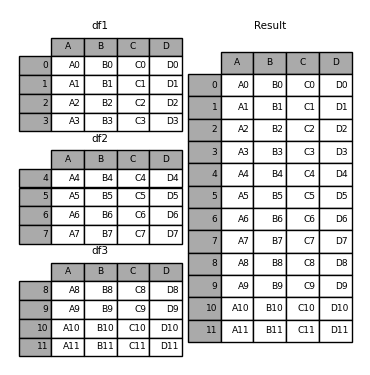

In [92]:
Image("../img/merging_concat_basic.png")

In [83]:
result = pd.concat(frame, keys = ['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

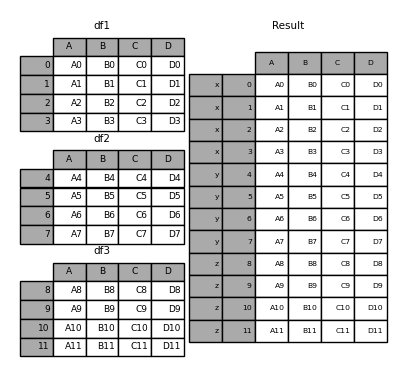

In [93]:
Image("../img/merging_concat_keys.png")

In [85]:
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [86]:
result.loc[['y', 'z']]

A    B    C    D
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

### Note
만약, 아래와 같은 패턴의 파일읽기를 해서 DataFrame형태로 concat를 해야 한다면 ?

In [ ]:
frames = [ process_your_file(f) for f in files ]
result = pd.concat(frames)

`concat`는 내부적으로 데이터셋을 copy하고 append하므로 루프내에서는 사용하는 경우엔 ,성능에 상당한 damage를 주기때문에 위의 패턴을 루프내에서 사용한다면 list comprehension을 사용해라.

In [88]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
   ...:                     'D': ['D2', 'D3', 'D6', 'D7'],
   ...:                     'F': ['F2', 'F3', 'F6', 'F7']},
   ...:                    index=[2, 3, 6, 7])

join옵션의 default는 `outer` 는 RDBMS의 `full outer join`의 개념과 유사
Changed in version 0.23.0.

가능하다면 sort=False옵션을 명시하라.

In [89]:
result = pd.concat([df1, df4], axis = 1, sort = False)  
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


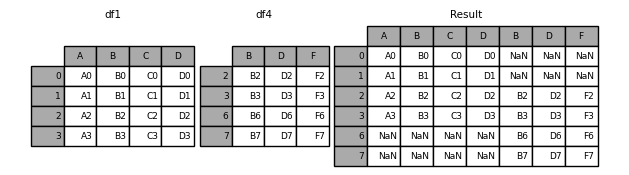

In [94]:
Image("../img/merging_concat_axis1.png")

In [90]:
result = pd.concat([df1, df4], axis = 1, join = 'inner', sort = False)  
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [ ]:
result = pd.concat([df1, df4], axis = 1, join = 'inner')  
result

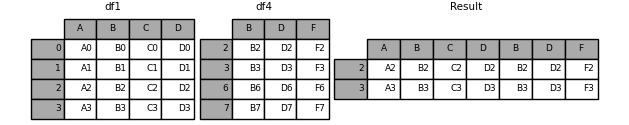

In [96]:
Image("../img/merging_concat_axis1_inner.png")

#### 다른 데이터프레임의 인덱스를 재사용한다면?

In [99]:
df1.index

Int64Index([0, 1, 2, 3], dtype='int64')

#### 방법1

In [102]:
result = pd.concat([df1, df4], axis = 1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


#### 방법2
* df1.index을 재사용해서 데이터프레임을 생성

In [106]:
result = pd.concat([df1, df4], axis = 1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


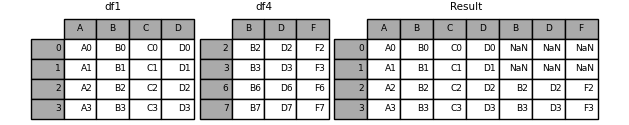

In [108]:
Image("../img/merging_concat_axis1_join_axes.png")

### `append()`를 활용한 concat()
* `aixs = 0`를 기준으로 concat,

In [110]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [111]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [116]:
# ignore_index = False : 기존 인덱스를 그대로 유지(기본값)
result = df1.append(df2) 
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


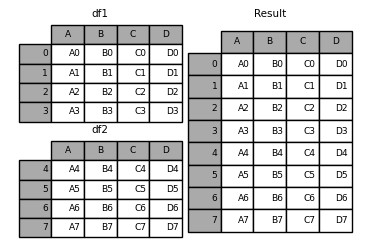

In [121]:
Image("../img/merging_append1.png")

In [128]:
result = df1.append(df4, sort = False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


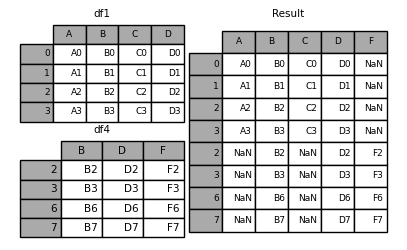

In [129]:
Image("../img/merging_append2.png")

In [132]:
result = df1.append([df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


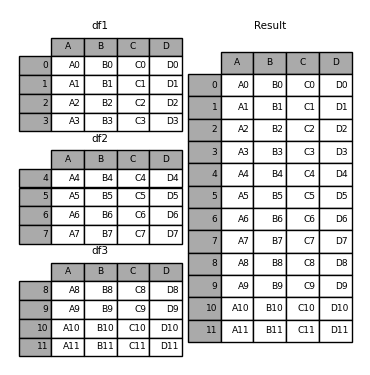

In [130]:
Image("../img/merging_append3.png")

* `append()`는 원본을 변경하는 것이 아니라 **변경된 복사본을 리턴**한다.(주의)

### Ignoring indexes on the concatenation axis¶

In [134]:
result = pd.concat([df1, df4], ignore_index = True, sort = False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


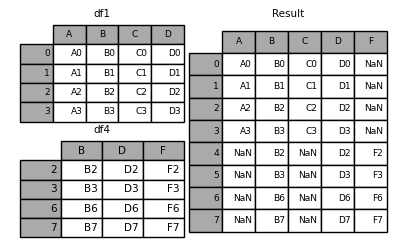

In [135]:
Image("../img/merging_concat_ignore_index.png")

In [136]:
result = df1.append(df4, ignore_index  = True, sort = False)  # 위의 결과와 동일함.
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


### Series와 DataFrame의 병합(concat)

In [138]:
s1 = pd.Series(['x0', 'x1', 'x2', 'x3', 'x4'], name = 'X')
s1

0    x0
1    x1
2    x2
3    x3
4    x4
Name: X, dtype: object

In [141]:
result = pd.concat([df1, s1], axis = 1)
result

,A,B,C,D,X
0,A0,B0,C0,D0,x0
1,A1,B1,C1,D1,x1
2,A2,B2,C2,D2,x2
3,A3,B3,C3,D3,x3
4,NaN,NaN,NaN,NaN,x4


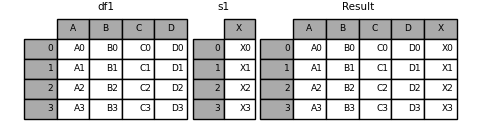

In [149]:
Image("../img/merging_concat_mixed_ndim.png")

In [148]:
result = pd.concat([df1, s1], axis = 0)
result

,A,B,C,D,0
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
0,NaN,NaN,NaN,NaN,x0
1,NaN,NaN,NaN,NaN,x1
2,NaN,NaN,NaN,NaN,x2
3,NaN,NaN,NaN,NaN,x3
4,NaN,NaN,NaN,NaN,x4


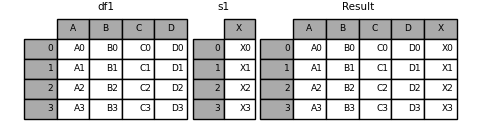

In [150]:
Image("../img/merging_concat_mixed_ndim (1).png")

In [152]:
s2 = pd.Series(['_0', '_1', '_2', '_3'])

In [ ]:
result  = pd.concat([df1, s2, s2, s2], axis = 1)
result

## Group키를 이용한 병합(concat)

In [158]:
s3  = pd.Series([0, 1, 2, 3], name = 'Foo')
s4 = pd.Series([0, 1, 2, 3])
s5 = pd.Series([0, 1, 4, 5])

pd.concat([s3, s4, s5], axis = 1)

,Foo,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [160]:
pd.concat([s3, s4, s5], axis = 1, keys = ['read', 'blue', 'yellow'])

,read,blue,yellow
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


In [163]:
frame, pd.concat(frame , keys = ['x', 'y', 'z'])

([    A   B   C   D
  0  A0  B0  C0  D0
  1  A1  B1  C1  D1
  2  A2  B2  C2  D2
  3  A3  B3  C3  D3,
      A   B   C   D
  4  A4  B4  C4  D4
  5  A5  B5  C5  D5
  6  A6  B6  C6  D6
  7  A7  B7  C7  D7,
        A    B    C    D
  8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11],
         A    B    C    D
 x 0    A0   B0   C0   D0
   1    A1   B1   C1   D1
   2    A2   B2   C2   D2
   3    A3   B3   C3   D3
 y 4    A4   B4   C4   D4
   5    A5   B5   C5   D5
   6    A6   B6   C6   D6
   7    A7   B7   C7   D7
 z 8    A8   B8   C8   D8
   9    A9   B9   C9   D9
   10  A10  B10  C10  D10
   11  A11  B11  C11  D11)

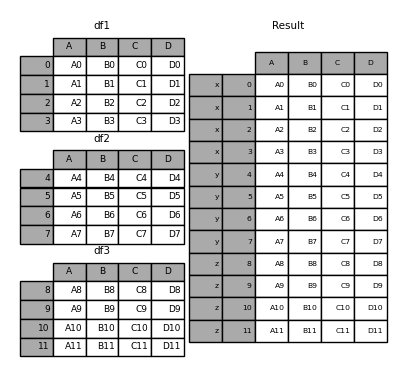

In [164]:
Image("../img/merging_concat_group_keys2.png")

### Dict형에 포함된 데이터프레임형태을 concat하기 

In [167]:
piece = {'x':df1, 'y': df2, 'z': df3}
result  = pd.concat(piece)
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [169]:
result = pd.concat(piece, keys=['z', 'y'])